In [1]:
import numpy as np
from scipy import stats
import scipy.linalg as lin
import torch
import sklearn.linear_model as sklm
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

import core
import wocca
import templates as tmpl
import visualize as vis
import icons

from ds1_leipzig import *

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:39: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_ref = mne.io.read_raw_eeglab(path + full_fn[0] + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:39: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_ref = mne.io.read_raw_eeglab(path + full_fn[0] + ".set").load_data()


In [610]:
import importlib
importlib.reload(icons)

<module 'icons' from '/data/liyichao/code/microstates/wocca_project_code/icons.py'>

In [2]:
pickle_prefix = "../wocca_project_pickles/ds1_leipzig_"
bounds_fn = pickle_prefix + "bounds.pickle"
wocca_fn = pickle_prefix + "wocca.pickle"
affinity_fn = pickle_prefix + "affinity.pickle"
microstate_fn = pickle_prefix + "microstate.pickle"
microstate_aff_fn = pickle_prefix + "microstate_aff.pickle"

ages = np.array([int(st[ : 2]) for st in get_age(subj_ids + subj_ids_ext)])
age_labels = np.array(ages > 50, dtype = int)

### Cluster EEG microstate templates

In [38]:
# %% Batch clustering
# WARNING: MAY TAKE VERY LONG, LIKELY MORE THAN 10 HOURS

random_seed = 1
random_state = np.random.RandomState(seed = random_seed)
ms_clu_res = tmpl.batch_clustering(iter_cms, n_file = n_fn_core, n_rep = 1000, n_map = 20000, k_clu = [4], \
                                   peak_only = True, random_state = random_state, verbose = True)

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EO.fdt
Reading 0 ... 119748  =      0.000 ...   478.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010005_EO.fdt
Reading 0 ... 119821  =      0.000 ...   479.284 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010012_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010012_EO.fdt
Reading 0 ... 118402  =      0.000 ...   473.608 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010017_EC.fdt
Reading 0 ... 119451  =      0.000 ...   477.804 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010017_EO.fdt
Reading 0 ... 118769  =      0.000 ...   475.076 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010021_EC.fdt
Reading 0 ... 114594  =      0.000 ...   458.376 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010021_EO.fdt
Reading 0 ... 114834  =      0.000 ...   459.336 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010022_EC.fdt
Reading 0 ... 119418  =      0.000 ...   477.672 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010022_EO.fdt
Reading 0 ... 118241  =      0.000 ...   472.964 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010023_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010023_EO.fdt
Reading 0 ... 105067  =      0.000 ...   420.268 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010024_EO.fdt
Reading 0 ... 118118  =      0.000 ...   472.472 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010028_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010028_EO.fdt
Reading 0 ... 119644  =      0.000 ...   478.576 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010029_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010029_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010030_EO.fdt
Reading 0 ... 117383  =      0.000 ...   469.532 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010035_EC.fdt
Reading 0 ... 119590  =      0.000 ...   478.360 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010035_EO.fdt
Reading 0 ... 119460  =      0.000 ...   477.840 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010039_EC.fdt
Reading 0 ... 116709  =      0.000 ...   466.836 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010039_EO.fdt
Reading 0 ... 117024  =      0.000 ...   468.096 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010040_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010040_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010046_EC.fdt
Reading 0 ... 119195  =      0.000 ...   476.780 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010046_EO.fdt
Reading 0 ... 114865  =      0.000 ...   459.460 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010048_EC.fdt
Reading 0 ... 119604  =      0.000 ...   478.416 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010048_EO.fdt
Reading 0 ... 117829  =      0.000 ...   471.316 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010052_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010052_EO.fdt
Reading 0 ... 117778  =      0.000 ...   471.112 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010056_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010056_EO.fdt
Reading 0 ... 118258  =      0.000 ...   473.032 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010059_EC.fdt
Reading 0 ... 118485  =      0.000 ...   473.940 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010059_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010060_EC.fdt
Reading 0 ... 118467  =      0.000 ...   473.868 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010060_EO.fdt
Reading 0 ... 111791  =      0.000 ...   447.164 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010065_EC.fdt
Reading 0 ... 116806  =      0.000 ...   467.224 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010065_EO.fdt
Reading 0 ... 113273  =      0.000 ...   453.092 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010075_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010075_EO.fdt
Reading 0 ... 117472  =      0.000 ...   469.888 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010084_EC.fdt
Reading 0 ... 115541  =      0.000 ...   462.164 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010084_EO.fdt
Reading 0 ... 118973  =      0.000 ...   475.892 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010134_EC.fdt
Reading 0 ... 119530  =      0.000 ...   478.120 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010134_EO.fdt
Reading 0 ... 119152  =      0.000 ...   476.608 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010137_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010137_EO.fdt
Reading 0 ... 119070  =      0.000 ...   476.280 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010138_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010138_EO.fdt
Reading 0 ... 119785  =      0.000 ...   479.140 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010141_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010141_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010142_EC.fdt
Reading 0 ... 118913  =      0.000 ...   475.652 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010142_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010162_EC.fdt
Reading 0 ... 115826  =      0.000 ...   463.304 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010162_EO.fdt
Reading 0 ... 115761  =      0.000 ...   463.044 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010164_EC.fdt
Reading 0 ... 115697  =      0.000 ...   462.788 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010164_EO.fdt
Reading 0 ... 119996  =      0.000 ...   479.984 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010176_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010176_EO.fdt
Reading 0 ... 115362  =      0.000 ...   461.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010183_EC.fdt
Reading 0 ... 117399  =      0.000 ...   469.596 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010183_EO.fdt
Reading 0 ... 112170  =      0.000 ...   448.680 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010191_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010191_EO.fdt
Reading 0 ... 115983  =      0.000 ...   463.932 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010195_EC.fdt
Reading 0 ... 118641  =      0.000 ...   474.564 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010195_EO.fdt
Reading 0 ... 114906  =      0.000 ...   459.624 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010197_EC.fdt
Reading 0 ... 118379  =      0.000 ...   473.516 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010197_EO.fdt
Reading 0 ... 117064  =      0.000 ...   468.256 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010199_EC.fdt
Reading 0 ... 118755  =      0.000 ...   475.020 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010199_EO.fdt
Reading 0 ... 118643  =      0.000 ...   474.572 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010202_EC.fdt
Reading 0 ... 119063  =      0.000 ...   476.252 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010202_EO.fdt
Reading 0 ... 105912  =      0.000 ...   423.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010204_EC.fdt
Reading 0 ... 118733  =      0.000 ...   474.932 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010204_EO.fdt
Reading 0 ... 108520  =      0.000 ...   434.080 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010207_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010207_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010210_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010210_EO.fdt
Reading 0 ... 117511  =      0.000 ...   470.044 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010213_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010213_EO.fdt
Reading 0 ... 119376  =      0.000 ...   477.504 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010214_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010214_EO.fdt
Reading 0 ... 117919  =      0.000 ...   471.676 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010215_EC.fdt
Reading 0 ... 116148  =      0.000 ...   464.592 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010215_EO.fdt
Reading 0 ... 118132  =      0.000 ...   472.528 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010218_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010218_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010222_EO.fdt
Reading 0 ... 110857  =      0.000 ...   443.428 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010223_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010223_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010224_EO.fdt
Reading 0 ... 119735  =      0.000 ...   478.940 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010227_EC.fdt
Reading 0 ... 119997  =      0.000 ...   479.988 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010227_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010230_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010230_EO.fdt
Reading 0 ... 117741  =      0.000 ...   470.964 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010233_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010233_EO.fdt
Reading 0 ... 118467  =      0.000 ...   473.868 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010234_EC.fdt
Reading 0 ... 117381  =      0.000 ...   469.524 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010234_EO.fdt
Reading 0 ... 119490  =      0.000 ...   477.960 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010236_EC.fdt
Reading 0 ... 119593  =      0.000 ...   478.372 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010236_EO.fdt
Reading 0 ... 119209  =      0.000 ...   476.836 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010238_EC.fdt
Reading 0 ... 118536  =      0.000 ...   474.144 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010238_EO.fdt
Reading 0 ... 118003  =      0.000 ...   472.012 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010243_EC.fdt
Reading 0 ... 119738  =      0.000 ...   478.952 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010243_EO.fdt
Reading 0 ... 119428  =      0.000 ...   477.712 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010246_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010246_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010247_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010247_EO.fdt
Reading 0 ... 119467  =      0.000 ...   477.868 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010248_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010248_EO.fdt
Reading 0 ... 119997  =      0.000 ...   479.988 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010250_EC.fdt
Reading 0 ... 119074  =      0.000 ...   476.296 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010250_EO.fdt
Reading 0 ... 113208  =      0.000 ...   452.832 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010251_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010251_EO.fdt
Reading 0 ... 118910  =      0.000 ...   475.640 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010252_EC.fdt
Reading 0 ... 119080  =      0.000 ...   476.320 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010252_EO.fdt
Reading 0 ... 118369  =      0.000 ...   473.476 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010254_EC.fdt
Reading 0 ... 118294  =      0.000 ...   473.176 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010254_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010255_EC.fdt
Reading 0 ... 119370  =      0.000 ...   477.480 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010255_EO.fdt
Reading 0 ... 117136  =      0.000 ...   468.544 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010256_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010256_EO.fdt
Reading 0 ... 119800  =      0.000 ...   479.200 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010264_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010264_EO.fdt
Reading 0 ... 111893  =      0.000 ...   447.572 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010268_EC.fdt
Reading 0 ... 118978  =      0.000 ...   475.912 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010268_EO.fdt
Reading 0 ... 117507  =      0.000 ...   470.028 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010269_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010269_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010273_EC.fdt
Reading 0 ... 119771  =      0.000 ...   479.084 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010273_EO.fdt
Reading 0 ... 117595  =      0.000 ...   470.380 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010283_EC.fdt
Reading 0 ... 119330  =      0.000 ...   477.320 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010283_EO.fdt
Reading 0 ... 113392  =      0.000 ...   453.568 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010288_EC.fdt
Reading 0 ... 116115  =      0.000 ...   464.460 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010288_EO.fdt
Reading 0 ... 113771  =      0.000 ...   455.084 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010289_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010289_EO.fdt
Reading 0 ... 116005  =      0.000 ...   464.020 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010292_EC.fdt
Reading 0 ... 119288  =      0.000 ...   477.152 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010292_EO.fdt
Reading 0 ... 119711  =      0.000 ...   478.844 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010294_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010294_EO.fdt
Reading 0 ... 110412  =      0.000 ...   441.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010295_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010295_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010296_EC.fdt
Reading 0 ... 119998  =      0.000 ...   479.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010296_EO.fdt
Reading 0 ... 118573  =      0.000 ...   474.292 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010297_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010298_EC.fdt
Reading 0 ... 118659  =      0.000 ...   474.636 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010298_EO.fdt
Reading 0 ... 117036  =      0.000 ...   468.144 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010299_EC.fdt
Reading 0 ... 118777  =      0.000 ...   475.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010299_EO.fdt
Reading 0 ... 118359  =      0.000 ...   473.436 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010300_EC.fdt
Reading 0 ... 117704  =      0.000 ...   470.816 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010300_EO.fdt
Reading 0 ... 117928  =      0.000 ...   471.712 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010301_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010301_EO.fdt
Reading 0 ... 119996  =      0.000 ...   479.984 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010304_EC.fdt
Reading 0 ... 118539  =      0.000 ...   474.156 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010304_EO.fdt
Reading 0 ... 119441  =      0.000 ...   477.764 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010306_EC.fdt
Reading 0 ... 119502  =      0.000 ...   478.008 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010306_EO.fdt
Reading 0 ... 119418  =      0.000 ...   477.672 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010309_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010309_EO.fdt
Reading 0 ... 115258  =      0.000 ...   461.032 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010321_EC.fdt
Reading 0 ... 119975  =      0.000 ...   479.900 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010321_EO.fdt
Reading 0 ... 118852  =      0.000 ...   475.408 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
0 / 1000  -  4 of [4]
1 / 1000  -  4 of [4]
2 / 1000  -  4 of [4]
3 / 1000  -  4 of [4]
4 / 1000  -  4 of [4]
5 / 1000  -  4 of [4]
6 / 1000  -  4 of [4]
7 / 1000  -  4 of [4]
8 / 1000  -  4 of [4]
9 / 1000  -  4 of [4]
10 / 1000  -  4 of [4]
11 / 1000  -  4 of [4]
12 / 1000  -  4 of [4]
13 / 1000  -  4 of [4]
14 / 1000  -  4 of [4]
15 / 1000  -  4 of [4]
16 / 1000  -  4 of [4]
17 / 1000  -  4 of [4]
18 / 1000  -  4 of [4]
19 / 1000  -  4 of [4]
20 / 1000  -  4 of [4]
21 / 1000  -  4 of [4]
22 / 1000  -  4 of [4]
23 / 1000  -  4 of [4]
24 / 1000  -  4 of [4]
25 / 1000  -  4 of [4]
26 / 1000  -  4 of [4]
27 / 1000  -  4 of [4]
28 / 1000  -  4 of [4]
29 / 1000  -  4 of [4]
30 / 1000  -  4 of [4]
31 / 1000  -  4 of [4]
32 / 1000  -  4 of [4]
33 / 1000  -  4 of [4]
34 / 1000  -  4 of [4]
35 / 1000  -  4 of [4]
36 / 1000  -  4 of [4]
37 / 1000  -  4 of [4]
38 / 1000  -  4 of [4]
39

In [39]:
# %% Batch evaluation

ms_clu_dist, ms_clu_dn = tmpl.batch_evaluation(iter_cms, n_file = n_fn_core, centroids = ms_clu_res, peak_only = True)

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EO.fdt
Reading 0 ... 119748  =      0.000 ...   478.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010005_EO.fdt
Reading 0 ... 119821  =      0.000 ...   479.284 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010012_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010012_EO.fdt
Reading 0 ... 118402  =      0.000 ...   473.608 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010017_EC.fdt
Reading 0 ... 119451  =      0.000 ...   477.804 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010017_EO.fdt
Reading 0 ... 118769  =      0.000 ...   475.076 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010021_EC.fdt
Reading 0 ... 114594  =      0.000 ...   458.376 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010021_EO.fdt
Reading 0 ... 114834  =      0.000 ...   459.336 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010022_EC.fdt
Reading 0 ... 119418  =      0.000 ...   477.672 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010022_EO.fdt
Reading 0 ... 118241  =      0.000 ...   472.964 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010023_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010023_EO.fdt
Reading 0 ... 105067  =      0.000 ...   420.268 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010024_EO.fdt
Reading 0 ... 118118  =      0.000 ...   472.472 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010028_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010028_EO.fdt
Reading 0 ... 119644  =      0.000 ...   478.576 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010029_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010029_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010030_EO.fdt
Reading 0 ... 117383  =      0.000 ...   469.532 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010035_EC.fdt
Reading 0 ... 119590  =      0.000 ...   478.360 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010035_EO.fdt
Reading 0 ... 119460  =      0.000 ...   477.840 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010039_EC.fdt
Reading 0 ... 116709  =      0.000 ...   466.836 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010039_EO.fdt
Reading 0 ... 117024  =      0.000 ...   468.096 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010040_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010040_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010046_EC.fdt
Reading 0 ... 119195  =      0.000 ...   476.780 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010046_EO.fdt
Reading 0 ... 114865  =      0.000 ...   459.460 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010048_EC.fdt
Reading 0 ... 119604  =      0.000 ...   478.416 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010048_EO.fdt
Reading 0 ... 117829  =      0.000 ...   471.316 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010052_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010052_EO.fdt
Reading 0 ... 117778  =      0.000 ...   471.112 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010056_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010056_EO.fdt
Reading 0 ... 118258  =      0.000 ...   473.032 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010059_EC.fdt
Reading 0 ... 118485  =      0.000 ...   473.940 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010059_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010060_EC.fdt
Reading 0 ... 118467  =      0.000 ...   473.868 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010060_EO.fdt
Reading 0 ... 111791  =      0.000 ...   447.164 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010065_EC.fdt
Reading 0 ... 116806  =      0.000 ...   467.224 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010065_EO.fdt
Reading 0 ... 113273  =      0.000 ...   453.092 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010075_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010075_EO.fdt
Reading 0 ... 117472  =      0.000 ...   469.888 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010084_EC.fdt
Reading 0 ... 115541  =      0.000 ...   462.164 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010084_EO.fdt
Reading 0 ... 118973  =      0.000 ...   475.892 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010134_EC.fdt
Reading 0 ... 119530  =      0.000 ...   478.120 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010134_EO.fdt
Reading 0 ... 119152  =      0.000 ...   476.608 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010137_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010137_EO.fdt
Reading 0 ... 119070  =      0.000 ...   476.280 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010138_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010138_EO.fdt
Reading 0 ... 119785  =      0.000 ...   479.140 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010141_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010141_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010142_EC.fdt
Reading 0 ... 118913  =      0.000 ...   475.652 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010142_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010162_EC.fdt
Reading 0 ... 115826  =      0.000 ...   463.304 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010162_EO.fdt
Reading 0 ... 115761  =      0.000 ...   463.044 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010164_EC.fdt
Reading 0 ... 115697  =      0.000 ...   462.788 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010164_EO.fdt
Reading 0 ... 119996  =      0.000 ...   479.984 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010176_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010176_EO.fdt
Reading 0 ... 115362  =      0.000 ...   461.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010183_EC.fdt
Reading 0 ... 117399  =      0.000 ...   469.596 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010183_EO.fdt
Reading 0 ... 112170  =      0.000 ...   448.680 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010191_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010191_EO.fdt
Reading 0 ... 115983  =      0.000 ...   463.932 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010195_EC.fdt
Reading 0 ... 118641  =      0.000 ...   474.564 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010195_EO.fdt
Reading 0 ... 114906  =      0.000 ...   459.624 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010197_EC.fdt
Reading 0 ... 118379  =      0.000 ...   473.516 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010197_EO.fdt
Reading 0 ... 117064  =      0.000 ...   468.256 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010199_EC.fdt
Reading 0 ... 118755  =      0.000 ...   475.020 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010199_EO.fdt
Reading 0 ... 118643  =      0.000 ...   474.572 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010202_EC.fdt
Reading 0 ... 119063  =      0.000 ...   476.252 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010202_EO.fdt
Reading 0 ... 105912  =      0.000 ...   423.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010204_EC.fdt
Reading 0 ... 118733  =      0.000 ...   474.932 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010204_EO.fdt
Reading 0 ... 108520  =      0.000 ...   434.080 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010207_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010207_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010210_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010210_EO.fdt
Reading 0 ... 117511  =      0.000 ...   470.044 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010213_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010213_EO.fdt
Reading 0 ... 119376  =      0.000 ...   477.504 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010214_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010214_EO.fdt
Reading 0 ... 117919  =      0.000 ...   471.676 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010215_EC.fdt
Reading 0 ... 116148  =      0.000 ...   464.592 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010215_EO.fdt
Reading 0 ... 118132  =      0.000 ...   472.528 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010218_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010218_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010222_EO.fdt
Reading 0 ... 110857  =      0.000 ...   443.428 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010223_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010223_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010224_EO.fdt
Reading 0 ... 119735  =      0.000 ...   478.940 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010227_EC.fdt
Reading 0 ... 119997  =      0.000 ...   479.988 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010227_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010230_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010230_EO.fdt
Reading 0 ... 117741  =      0.000 ...   470.964 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010233_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010233_EO.fdt
Reading 0 ... 118467  =      0.000 ...   473.868 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010234_EC.fdt
Reading 0 ... 117381  =      0.000 ...   469.524 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010234_EO.fdt
Reading 0 ... 119490  =      0.000 ...   477.960 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010236_EC.fdt
Reading 0 ... 119593  =      0.000 ...   478.372 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010236_EO.fdt
Reading 0 ... 119209  =      0.000 ...   476.836 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010238_EC.fdt
Reading 0 ... 118536  =      0.000 ...   474.144 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010238_EO.fdt
Reading 0 ... 118003  =      0.000 ...   472.012 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010243_EC.fdt
Reading 0 ... 119738  =      0.000 ...   478.952 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010243_EO.fdt
Reading 0 ... 119428  =      0.000 ...   477.712 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010246_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010246_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010247_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010247_EO.fdt
Reading 0 ... 119467  =      0.000 ...   477.868 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010248_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010248_EO.fdt
Reading 0 ... 119997  =      0.000 ...   479.988 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010250_EC.fdt
Reading 0 ... 119074  =      0.000 ...   476.296 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010250_EO.fdt
Reading 0 ... 113208  =      0.000 ...   452.832 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010251_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010251_EO.fdt
Reading 0 ... 118910  =      0.000 ...   475.640 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010252_EC.fdt
Reading 0 ... 119080  =      0.000 ...   476.320 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010252_EO.fdt
Reading 0 ... 118369  =      0.000 ...   473.476 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010254_EC.fdt
Reading 0 ... 118294  =      0.000 ...   473.176 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010254_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010255_EC.fdt
Reading 0 ... 119370  =      0.000 ...   477.480 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010255_EO.fdt
Reading 0 ... 117136  =      0.000 ...   468.544 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010256_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010256_EO.fdt
Reading 0 ... 119800  =      0.000 ...   479.200 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010264_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010264_EO.fdt
Reading 0 ... 111893  =      0.000 ...   447.572 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010268_EC.fdt
Reading 0 ... 118978  =      0.000 ...   475.912 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010268_EO.fdt
Reading 0 ... 117507  =      0.000 ...   470.028 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010269_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010269_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010273_EC.fdt
Reading 0 ... 119771  =      0.000 ...   479.084 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010273_EO.fdt
Reading 0 ... 117595  =      0.000 ...   470.380 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010283_EC.fdt
Reading 0 ... 119330  =      0.000 ...   477.320 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010283_EO.fdt
Reading 0 ... 113392  =      0.000 ...   453.568 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010288_EC.fdt
Reading 0 ... 116115  =      0.000 ...   464.460 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010288_EO.fdt
Reading 0 ... 113771  =      0.000 ...   455.084 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010289_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010289_EO.fdt
Reading 0 ... 116005  =      0.000 ...   464.020 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010292_EC.fdt
Reading 0 ... 119288  =      0.000 ...   477.152 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010292_EO.fdt
Reading 0 ... 119711  =      0.000 ...   478.844 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010294_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010294_EO.fdt
Reading 0 ... 110412  =      0.000 ...   441.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010295_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010295_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010296_EC.fdt
Reading 0 ... 119998  =      0.000 ...   479.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010296_EO.fdt
Reading 0 ... 118573  =      0.000 ...   474.292 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010297_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010298_EC.fdt
Reading 0 ... 118659  =      0.000 ...   474.636 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010298_EO.fdt
Reading 0 ... 117036  =      0.000 ...   468.144 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010299_EC.fdt
Reading 0 ... 118777  =      0.000 ...   475.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010299_EO.fdt
Reading 0 ... 118359  =      0.000 ...   473.436 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010300_EC.fdt
Reading 0 ... 117704  =      0.000 ...   470.816 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010300_EO.fdt
Reading 0 ... 117928  =      0.000 ...   471.712 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010301_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010301_EO.fdt
Reading 0 ... 119996  =      0.000 ...   479.984 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010304_EC.fdt
Reading 0 ... 118539  =      0.000 ...   474.156 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010304_EO.fdt
Reading 0 ... 119441  =      0.000 ...   477.764 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010306_EC.fdt
Reading 0 ... 119502  =      0.000 ...   478.008 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010306_EO.fdt
Reading 0 ... 119418  =      0.000 ...   477.672 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010309_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010309_EO.fdt
Reading 0 ... 115258  =      0.000 ...   461.032 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010321_EC.fdt
Reading 0 ... 119975  =      0.000 ...   479.900 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010321_EO.fdt
Reading 0 ... 118852  =      0.000 ...   475.408 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [40]:
msls_d, msls_ad, msc, msls_v = tmpl.analyze_landscape(ms_clu_res[0], ms_clu_dist[0], ms_clu_dn[0], convex = True)

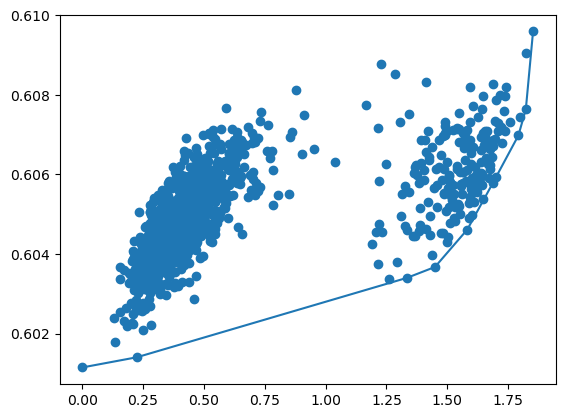

In [42]:
plt.scatter(msls_d, msls_ad)
plt.plot(msls_d[msls_v], msls_ad[msls_v])

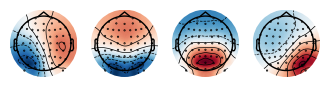

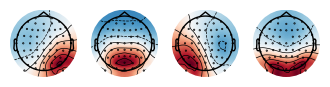

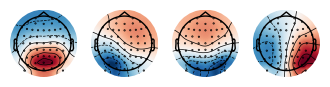

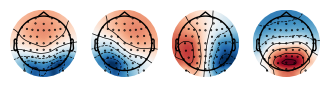

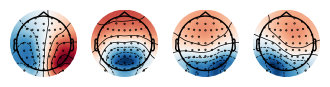

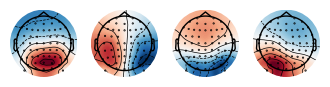

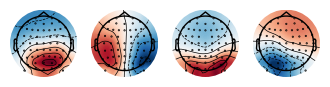

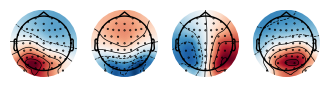

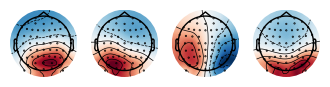

In [43]:
for j in msls_v:
    plt.figure(figsize = [4, 1])
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        vis.disp_topomap(info, ms_clu_res[0][j, i], cmap = "RdBu_r", colorbar = False)

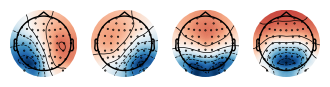

In [5]:
# %% Reorder and flipping microstate centroids according to microstate naming convention

order = [0, 3, 1, 2]
msc = msc[order]

manual_correction = [False, True, False, True]
for i in range(4):
    if manual_correction[i]:
        msc[i] *= -1

plt.figure(figsize = [4, 1])
for i in range(4):
    plt.subplot(1, 4, i + 1)
    vis.disp_topomap(info, msc[i], cmap = "RdBu_r", colorbar = False)

In [6]:
# %% Save clustering and evaluation raw results

with open(microstate_fn, mode = "wb") as FOut:
    pickle.dump((msc, ms_clu_res, ms_clu_dist, ms_clu_dn, msls_d, msls_ad, msls_v), FOut)

In [9]:
# %% Calculate and save microstate affinities

# Load phasemaps and segment boundaries
ms_affs = []
peaks = []

# Load data
for i in range(n_fn_full):
    tmp = iter_cms(i)
    ms_affs.append(core.topomap_affinity(tmp[0].data, msc, True, True))
    peaks.append(tmp[0].peaks.copy())

# Save as pickle
with open(microstate_aff_fn, mode = "wb") as FOut:
    pickle.dump((ms_affs, peaks), FOut)

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EO.fdt
Reading 0 ... 119748  =      0.000 ...   478.992 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010005_EO.fdt
Reading 0 ... 119821  =      0.000 ...   479.284 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010012_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010012_EO.fdt
Reading 0 ... 118402  =      0.000 ...   473.608 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010017_EC.fdt
Reading 0 ... 119451  =      0.000 ...   477.804 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010017_EO.fdt
Reading 0 ... 118769  =      0.000 ...   475.076 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010021_EC.fdt
Reading 0 ... 114594  =      0.000 ...   458.376 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()



IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010021_EO.fdt
Reading 0 ... 114834  =      0.000 ...   459.336 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010022_EC.fdt
Reading 0 ... 119418  =      0.000 ...   477.672 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010022_EO.fdt
Reading 0 ... 118241  =      0.000 ...   472.964 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010023_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010023_EO.fdt
Reading 0 ... 105067  =      0.000 ...   420.268 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010024_EC.fdt
Reading 0 ... 116677  =      0.000 ...   466.708 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010024_EO.fdt
Reading 0 ... 118118  =      0.000 ...   472.472 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010028_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010028_EO.fdt
Reading 0 ... 119644  =      0.000 ...   478.576 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010029_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010029_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010030_EC.fdt
Reading 0 ... 118602  =      0.000 ...   474.408 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010030_EO.fdt
Reading 0 ... 117383  =      0.000 ...   469.532 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010035_EC.fdt
Reading 0 ... 119590  =      0.000 ...   478.360 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010035_EO.fdt
Reading 0 ... 119460  =      0.000 ...   477.840 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010039_EC.fdt
Reading 0 ... 116709  =      0.000 ...   466.836 secs...
Filtering raw data in 1 contiguous segment


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010039_EO.fdt
Reading 0 ... 117024  =      0.000 ...   468.096 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010040_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010040_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010046_EC.fdt
Reading 0 ... 119195  =      0.000 ...   476.780 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010046_EO.fdt
Reading 0 ... 114865  =      0.000 ...   459.460 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010048_EC.fdt
Reading 0 ... 119604  =      0.000 ...   478.416 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010048_EO.fdt
Reading 0 ... 117829  =      0.000 ...   471.316 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010052_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010052_EO.fdt
Reading 0 ... 117778  =      0.000 ...   471.112 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010056_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010056_EO.fdt
Reading 0 ... 118258  =      0.000 ...   473.032 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010059_EC.fdt
Reading 0 ... 118485  =      0.000 ...   473.940 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010059_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010060_EC.fdt
Reading 0 ... 118467  =      0.000 ...   473.868 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010060_EO.fdt
Reading 0 ... 111791  =      0.000 ...   447.164 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010065_EC.fdt
Reading 0 ... 116806  =      0.000 ...   467.224 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010065_EO.fdt
Reading 0 ... 113273  =      0.000 ...   453.092 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010075_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010075_EO.fdt
Reading 0 ... 117472  =      0.000 ...   469.888 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010084_EC.fdt
Reading 0 ... 115541  =      0.000 ...   462.164 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010084_EO.fdt
Reading 0 ... 118973  =      0.000 ...   475.892 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010134_EC.fdt
Reading 0 ... 119530  =      0.000 ...   478.120 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010134_EO.fdt
Reading 0 ... 119152  =      0.000 ...   476.608 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010137_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010137_EO.fdt
Reading 0 ... 119070  =      0.000 ...   476.280 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010138_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010138_EO.fdt
Reading 0 ... 119785  =      0.000 ...   479.140 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010141_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010141_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010142_EC.fdt
Reading 0 ... 118913  =      0.000 ...   475.652 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010142_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010162_EC.fdt
Reading 0 ... 115826  =      0.000 ...   463.304 secs...
Filtering raw data in 1 contiguous segment


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010162_EO.fdt
Reading 0 ... 115761  =      0.000 ...   463.044 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010164_EC.fdt
Reading 0 ... 115697  =      0.000 ...   462.788 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010164_EO.fdt
Reading 0 ... 119996  =      0.000 ...   479.984 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010176_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010176_EO.fdt
Reading 0 ... 115362  =      0.000 ...   461.448 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010183_EC.fdt
Reading 0 ... 117399  =      0.000 ...   469.596 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010183_EO.fdt
Reading 0 ... 112170  =      0.000 ...   448.680 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010191_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010191_EO.fdt
Reading 0 ... 115983  =      0.000 ...   463.932 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010195_EC.fdt
Reading 0 ... 118641  =      0.000 ...   474.564 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010195_EO.fdt
Reading 0 ... 114906  =      0.000 ...   459.624 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010197_EC.fdt
Reading 0 ... 118379  =      0.000 ...   473.516 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010197_EO.fdt
Reading 0 ... 117064  =      0.000 ...   468.256 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010199_EC.fdt
Reading 0 ... 118755  =      0.000 ...   475.020 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010199_EO.fdt
Reading 0 ... 118643  =      0.000 ...   474.572 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010202_EC.fdt
Reading 0 ... 119063  =      0.000 ...   476.252 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010202_EO.fdt
Reading 0 ... 105912  =      0.000 ...   423.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010204_EC.fdt
Reading 0 ... 118733  =      0.000 ...   474.932 secs...
Filtering raw data in 1 contiguous segment


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010204_EO.fdt
Reading 0 ... 108520  =      0.000 ...   434.080 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010207_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010207_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010210_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010210_EO.fdt
Reading 0 ... 117511  =      0.000 ...   470.044 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010213_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010213_EO.fdt
Reading 0 ... 119376  =      0.000 ...   477.504 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010214_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010214_EO.fdt
Reading 0 ... 117919  =      0.000 ...   471.676 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010215_EC.fdt
Reading 0 ... 116148  =      0.000 ...   464.592 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()



IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010215_EO.fdt
Reading 0 ... 118132  =      0.000 ...   472.528 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010218_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010218_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010222_EC.fdt
Reading 0 ... 118764  =      0.000 ...   475.056 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010222_EO.fdt
Reading 0 ... 110857  =      0.000 ...   443.428 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010223_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010223_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010224_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010224_EO.fdt
Reading 0 ... 119735  =      0.000 ...   478.940 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010227_EC.fdt
Reading 0 ... 119997  =      0.000 ...   479.988 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010227_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010230_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010230_EO.fdt
Reading 0 ... 117741  =      0.000 ...   470.964 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010233_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010233_EO.fdt
Reading 0 ... 118467  =      0.000 ...   473.868 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010234_EC.fdt
Reading 0 ... 117381  =      0.000 ...   469.524 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010234_EO.fdt
Reading 0 ... 119490  =      0.000 ...   477.960 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010236_EC.fdt
Reading 0 ... 119593  =      0.000 ...   478.372 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010236_EO.fdt
Reading 0 ... 119209  =      0.000 ...   476.836 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010238_EC.fdt
Reading 0 ... 118536  =      0.000 ...   474.144 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010238_EO.fdt
Reading 0 ... 118003  =      0.000 ...   472.012 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010243_EC.fdt
Reading 0 ... 119738  =      0.000 ...   478.952 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010243_EO.fdt
Reading 0 ... 119428  =      0.000 ...   477.712 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010246_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010246_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010247_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010247_EO.fdt
Reading 0 ... 119467  =      0.000 ...   477.868 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010248_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010248_EO.fdt
Reading 0 ... 119997  =      0.000 ...   479.988 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010250_EC.fdt
Reading 0 ... 119074  =      0.000 ...   476.296 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010250_EO.fdt
Reading 0 ... 113208  =      0.000 ...   452.832 secs...
Filtering raw data in 1 contiguous segment


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010251_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010251_EO.fdt
Reading 0 ... 118910  =      0.000 ...   475.640 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010252_EC.fdt
Reading 0 ... 119080  =      0.000 ...   476.320 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010252_EO.fdt
Reading 0 ... 118369  =      0.000 ...   473.476 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010254_EC.fdt
Reading 0 ... 118294  =      0.000 ...   473.176 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010254_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010255_EC.fdt
Reading 0 ... 119370  =      0.000 ...   477.480 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010255_EO.fdt
Reading 0 ... 117136  =      0.000 ...   468.544 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010256_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010256_EO.fdt
Reading 0 ... 119800  =      0.000 ...   479.200 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010264_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010264_EO.fdt
Reading 0 ... 111893  =      0.000 ...   447.572 secs...
Filtering raw data in 1 contiguous segment


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010268_EC.fdt
Reading 0 ... 118978  =      0.000 ...   475.912 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010268_EO.fdt
Reading 0 ... 117507  =      0.000 ...   470.028 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010269_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010269_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010273_EC.fdt
Reading 0 ... 119771  =      0.000 ...   479.084 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010273_EO.fdt
Reading 0 ... 117595  =      0.000 ...   470.380 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010283_EC.fdt
Reading 0 ... 119330  =      0.000 ...   477.320 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010283_EO.fdt
Reading 0 ... 113392  =      0.000 ...   453.568 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010288_EC.fdt
Reading 0 ... 116115  =      0.000 ...   464.460 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010288_EO.fdt
Reading 0 ... 113771  =      0.000 ...   455.084 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010289_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010289_EO.fdt
Reading 0 ... 116005  =      0.000 ...   464.020 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010292_EC.fdt
Reading 0 ... 119288  =      0.000 ...   477.152 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010292_EO.fdt
Reading 0 ... 119711  =      0.000 ...   478.844 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010294_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010294_EO.fdt
Reading 0 ... 110412  =      0.000 ...   441.648 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010295_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010295_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010296_EC.fdt
Reading 0 ... 119998  =      0.000 ...   479.992 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010296_EO.fdt
Reading 0 ... 118573  =      0.000 ...   474.292 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010297_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010297_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010298_EC.fdt
Reading 0 ... 118659  =      0.000 ...   474.636 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010298_EO.fdt
Reading 0 ... 117036  =      0.000 ...   468.144 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010299_EC.fdt
Reading 0 ... 118777  =      0.000 ...   475.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010299_EO.fdt
Reading 0 ... 118359  =      0.000 ...   473.436 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010300_EC.fdt
Reading 0 ... 117704  =      0.000 ...   470.816 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010300_EO.fdt
Reading 0 ... 117928  =      0.000 ...   471.712 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010301_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010301_EO.fdt
Reading 0 ... 119996  =      0.000 ...   479.984 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010304_EC.fdt
Reading 0 ... 118539  =      0.000 ...   474.156 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010304_EO.fdt
Reading 0 ... 119441  =      0.000 ...   477.764 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010306_EC.fdt
Reading 0 ... 119502  =      0.000 ...   478.008 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010306_EO.fdt
Reading 0 ... 119418  =      0.000 ...   477.672 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010309_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010309_EO.fdt
Reading 0 ... 115258  =      0.000 ...   461.032 secs...
Filtering raw data in 1 contiguous segment


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010321_EC.fdt
Reading 0 ... 119975  =      0.000 ...   479.900 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010321_EO.fdt
Reading 0 ... 118852  =      0.000 ...   475.408 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010002_EO.fdt
Reading 0 ... 117860  =      0.000 ...   471.440 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010003_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ...   464.044 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010006_EO.fdt
Reading 0 ... 110270  =      0.000 ...   441.080 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010007_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010007_EO.fdt
Reading 0 ... 119035  =      0.000 ...   476.140 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010010_EC.fdt
Reading 0 ... 119042  =      0.000 ...   476.168 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010010_EO.fdt
Reading 0 ... 114916  =      0.000 ...   459.664 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010016_EC.fdt
Reading 0 ... 119042  =      0.000 ...   476.168 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010016_EO.fdt
Reading 0 ... 119478  =      0.000 ...   477.912 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010019_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010019_EO.fdt
Reading 0 ... 119511  =      0.000 ...   478.044 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010020_EC.fdt
Reading 0 ... 107237  =      0.000 ...   428.948 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010020_EO.fdt
Reading 0 ... 104402  =      0.000 ...   417.608 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010026_EC.fdt
Reading 0 ... 114790  =      0.000 ...   459.160 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010026_EO.fdt
Reading 0 ... 108861  =      0.000 ...   435.444 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010027_EC.fdt
Reading 0 ... 119981  =      0.000 ...   479.924 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010027_EO.fdt
Reading 0 ... 119966  =      0.000 ...   479.864 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010031_EC.fdt
Reading 0 ... 119370  =      0.000 ...   477.480 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010031_EO.fdt
Reading 0 ... 116757  =      0.000 ...   467.028 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010032_EC.fdt
Reading 0 ... 118365  =      0.000 ...   473.460 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010032_EO.fdt
Reading 0 ... 118237  =      0.000 ...   472.948 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010033_EC.fdt
Reading 0 ... 119711  =      0.000 ...   478.844 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010033_EO.fdt
Reading 0 ... 118665  =      0.000 ...   474.660 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010034_EC.fdt
Reading 0 ... 115807  =      0.000 ...   463.228 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010034_EO.fdt
Reading 0 ... 114818  =      0.000 ...   459.272 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010036_EC.fdt
Reading 0 ... 118087  =      0.000 ...   472.348 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010036_EO.fdt
Reading 0 ... 113853  =      0.000 ...   455.412 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010037_EC.fdt
Reading 0 ... 119052  =      0.000 ...   476.208 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010037_EO.fdt
Reading 0 ... 119826  =      0.000 ...   479.304 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010038_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010038_EO.fdt
Reading 0 ... 117105  =      0.000 ...   468.420 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010041_EC.fdt
Reading 0 ... 118608  =      0.000 ...   474.432 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010041_EO.fdt
Reading 0 ... 115174  =      0.000 ...   460.696 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010042_EC.fdt
Reading 0 ... 117877  =      0.000 ...   471.508 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010042_EO.fdt
Reading 0 ... 115947  =      0.000 ...   463.788 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010044_EC.fdt
Reading 0 ... 119968  =      0.000 ...   479.872 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010044_EO.fdt
Reading 0 ... 119812  =      0.000 ...   479.248 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010045_EC.fdt
Reading 0 ... 117352  =      0.000 ...   469.408 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010045_EO.fdt
Reading 0 ... 115833  =      0.000 ...   463.332 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010047_EC.fdt
Reading 0 ... 119246  =      0.000 ...   476.984 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010047_EO.fdt
Reading 0 ... 116131  =      0.000 ...   464.524 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010049_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010049_EO.fdt
Reading 0 ... 117186  =      0.000 ...   468.744 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010050_EC.fdt
Reading 0 ... 118891  =      0.000 ...   475.564 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010050_EO.fdt
Reading 0 ... 119263  =      0.000 ...   477.052 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010051_EC.fdt
Reading 0 ... 111044  =      0.000 ...   444.176 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010051_EO.fdt
Reading 0 ... 105314  =      0.000 ...   421.256 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010053_EC.fdt
Reading 0 ... 119606  =      0.000 ...   478.424 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010053_EO.fdt
Reading 0 ... 118890  =      0.000 ...   475.560 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010061_EC.fdt
Reading 0 ... 117707  =      0.000 ...   470.828 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010061_EO.fdt
Reading 0 ... 116988  =      0.000 ...   467.952 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010062_EC.fdt
Reading 0 ... 118289  =      0.000 ...   473.156 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010062_EO.fdt
Reading 0 ... 114378  =      0.000 ...   457.512 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010063_EC.fdt
Reading 0 ... 119484  =      0.000 ...   477.936 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010063_EO.fdt
Reading 0 ... 116277  =      0.000 ...   465.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010064_EC.fdt
Reading 0 ... 111327  =      0.000 ...   445.308 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010064_EO.fdt
Reading 0 ... 119942  =      0.000 ...   479.768 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010066_EC.fdt
Reading 0 ... 119715  =      0.000 ...   478.860 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010066_EO.fdt
Reading 0 ... 115943  =      0.000 ...   463.772 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010067_EC.fdt
Reading 0 ... 119551  =      0.000 ...   478.204 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010067_EO.fdt
Reading 0 ... 118751  =      0.000 ...   475.004 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010068_EC.fdt
Reading 0 ... 119052  =      0.000 ...   476.208 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010068_EO.fdt
Reading 0 ... 119159  =      0.000 ...   476.636 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010069_EC.fdt
Reading 0 ... 119206  =      0.000 ...   476.824 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010069_EO.fdt
Reading 0 ... 117683  =      0.000 ...   470.732 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010070_EC.fdt
Reading 0 ... 119529  =      0.000 ...   478.116 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010070_EO.fdt
Reading 0 ... 118087  =      0.000 ...   472.348 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010071_EC.fdt
Reading 0 ... 116958  =      0.000 ...   467.832 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010071_EO.fdt
Reading 0 ... 110690  =      0.000 ...   442.760 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010072_EC.fdt
Reading 0 ... 119544  =      0.000 ...   478.176 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010072_EO.fdt
Reading 0 ... 119991  =      0.000 ...   479.964 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 56 sensor positions
Interpolating 5 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010073_EC.fdt
Reading 0 ... 118453  =      0.000 ...   473.812 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010073_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010074_EC.fdt
Reading 0 ... 119422  =      0.000 ...   477.688 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010074_EO.fdt
Reading 0 ... 116115  =      0.000 ...   464.460 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010076_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010076_EO.fdt
Reading 0 ... 119965  =      0.000 ...   479.860 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010079_EC.fdt
Reading 0 ... 116268  =      0.000 ...   465.072 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010079_EO.fdt
Reading 0 ... 113314  =      0.000 ...   453.256 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010080_EC.fdt
Reading 0 ... 118823  =      0.000 ...   475.292 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010080_EO.fdt
Reading 0 ... 118352  =      0.000 ...   473.408 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010081_EC.fdt
Reading 0 ... 119631  =      0.000 ...   478.524 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010081_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010083_EC.fdt
Reading 0 ... 119974  =      0.000 ...   479.896 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010083_EO.fdt
Reading 0 ... 119673  =      0.000 ...   478.692 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010085_EC.fdt
Reading 0 ... 119110  =      0.000 ...   476.440 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010085_EO.fdt
Reading 0 ... 119772  =      0.000 ...   479.088 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010086_EC.fdt
Reading 0 ... 112275  =      0.000 ...   449.100 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010086_EO.fdt
Reading 0 ... 110601  =      0.000 ...   442.404 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010088_EC.fdt
Reading 0 ... 118593  =      0.000 ...   474.372 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010088_EO.fdt
Reading 0 ... 114395  =      0.000 ...   457.580 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010089_EC.fdt
Reading 0 ... 109710  =      0.000 ...   438.840 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010089_EO.fdt
Reading 0 ... 115770  =      0.000 ...   463.080 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010090_EC.fdt
Reading 0 ... 119973  =      0.000 ...   479.892 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010090_EO.fdt
Reading 0 ... 119974  =      0.000 ...   479.896 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010091_EC.fdt
Reading 0 ... 119976  =      0.000 ...   479.904 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010091_EO.fdt
Reading 0 ... 118862  =      0.000 ...   475.448 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010092_EC.fdt
Reading 0 ... 114921  =      0.000 ...   459.684 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010092_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010093_EC.fdt
Reading 0 ... 119856  =      0.000 ...   479.424 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010093_EO.fdt
Reading 0 ... 119927  =      0.000 ...   479.708 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010094_EC.fdt
Reading 0 ... 118309  =      0.000 ...   473.236 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010094_EO.fdt
Reading 0 ... 117210  =      0.000 ...   468.840 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010104_EC.fdt
Reading 0 ... 119158  =      0.000 ...   476.632 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010104_EO.fdt
Reading 0 ... 117103  =      0.000 ...   468.412 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010126_EC.fdt
Reading 0 ... 119986  =      0.000 ...   479.944 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010126_EO.fdt
Reading 0 ... 119974  =      0.000 ...   479.896 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010136_EC.fdt
Reading 0 ... 119955  =      0.000 ...   479.820 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010136_EO.fdt
Reading 0 ... 119921  =      0.000 ...   479.684 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010146_EC.fdt
Reading 0 ... 119940  =      0.000 ...   479.760 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010146_EO.fdt
Reading 0 ... 119459  =      0.000 ...   477.836 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010148_EC.fdt
Reading 0 ... 119862  =      0.000 ...   479.448 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010148_EO.fdt
Reading 0 ... 119733  =      0.000 ...   478.932 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010150_EC.fdt
Reading 0 ... 119349  =      0.000 ...   477.396 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010150_EO.fdt
Reading 0 ... 118462  =      0.000 ...   473.848 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010152_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010152_EO.fdt
Reading 0 ... 119973  =      0.000 ...   479.892 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010155_EC.fdt
Reading 0 ... 116490  =      0.000 ...   465.960 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010155_EO.fdt
Reading 0 ... 117039  =      0.000 ...   468.156 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010157_EC.fdt
Reading 0 ... 118355  =      0.000 ...   473.420 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010157_EO.fdt
Reading 0 ... 119662  =      0.000 ...   478.648 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010163_EC.fdt
Reading 0 ... 119896  =      0.000 ...   479.584 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 56 sensor positions
Interpolating 5 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010163_EO.fdt
Reading 0 ... 119781  =      0.000 ...   479.124 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010165_EC.fdt
Reading 0 ... 119437  =      0.000 ...   477.748 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010165_EO.fdt
Reading 0 ... 118708  =      0.000 ...   474.832 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010166_EC.fdt
Reading 0 ... 114955  =      0.000 ...   459.820 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010166_EO.fdt
Reading 0 ... 112325  =      0.000 ...   449.300 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010168_EC.fdt
Reading 0 ... 118969  =      0.000 ...   475.876 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010168_EO.fdt
Reading 0 ... 112428  =      0.000 ...   449.712 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010170_EC.fdt
Reading 0 ... 113527  =      0.000 ...   454.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010170_EO.fdt
Reading 0 ... 119417  =      0.000 ...   477.668 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010192_EC.fdt
Reading 0 ... 119753  =      0.000 ...   479.012 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010192_EO.fdt
Reading 0 ... 117199  =      0.000 ...   468.796 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010194_EC.fdt
Reading 0 ... 118146  =      0.000 ...   472.584 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010194_EO.fdt
Reading 0 ... 108540  =      0.000 ...   434.160 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010196_EC.fdt
Reading 0 ... 119674  =      0.000 ...   478.696 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010196_EO.fdt
Reading 0 ... 117057  =      0.000 ...   468.228 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010200_EC.fdt
Reading 0 ... 108500  =      0.000 ...   434.000 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010200_EO.fdt
Reading 0 ... 115768  =      0.000 ...   463.072 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010201_EC.fdt
Reading 0 ... 117788  =      0.000 ...   471.152 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010201_EO.fdt
Reading 0 ... 117660  =      0.000 ...   470.640 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010219_EC.fdt
Reading 0 ... 112814  =      0.000 ...   451.256 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 56 sensor positions
Interpolating 5 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010219_EO.fdt
Reading 0 ... 114514  =      0.000 ...   458.056 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010220_EC.fdt
Reading 0 ... 119885  =      0.000 ...   479.540 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010220_EO.fdt
Reading 0 ... 119987  =      0.000 ...   479.948 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010226_EC.fdt
Reading 0 ... 119095  =      0.000 ...   476.380 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010226_EO.fdt
Reading 0 ... 118225  =      0.000 ...   472.900 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010228_EC.fdt
Reading 0 ... 118084  =      0.000 ...   472.336 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010228_EO.fdt
Reading 0 ... 117784  =      0.000 ...   471.136 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010229_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010229_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Data file name in EEG.data (sub-010229_E0.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-010229_EO.fdt).
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010231_EC.fdt
Reading 0 ... 119715  =      0.000 ...   478.860 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010231_EO.fdt
Reading 0 ... 118648  =      0.000 ...   474.592 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010232_EC.fdt
Reading 0 ... 119836  =      0.000 ...   479.344 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010232_EO.fdt
Reading 0 ... 117275  =      0.000 ...   469.100 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010239_EC.fdt
Reading 0 ... 119365  =      0.000 ...   477.460 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010239_EO.fdt
Reading 0 ... 116877  =      0.000 ...   467.508 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010240_EC.fdt
Reading 0 ... 119992  =      0.000 ...   479.968 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010240_EO.fdt
Reading 0 ... 119706  =      0.000 ...   478.824 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010241_EC.fdt
Reading 0 ... 119697  =      0.000 ...   478.788 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010241_EO.fdt
Reading 0 ... 117844  =      0.000 ...   471.376 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010242_EC.fdt
Reading 0 ... 119237  =      0.000 ...   476.948 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010242_EO.fdt
Reading 0 ... 115894  =      0.000 ...   463.576 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010244_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010244_EO.fdt
Reading 0 ... 119777  =      0.000 ...   479.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010245_EC.fdt
Reading 0 ... 117235  =      0.000 ...   468.940 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010245_EO.fdt
Reading 0 ... 115256  =      0.000 ...   461.024 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010249_EC.fdt
Reading 0 ... 119562  =      0.000 ...   478.248 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010249_EO.fdt
Reading 0 ... 119610  =      0.000 ...   478.440 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010257_EC.fdt
Reading 0 ... 119297  =      0.000 ...   477.188 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010257_EO.fdt
Reading 0 ... 114104  =      0.000 ...   456.416 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010258_EC.fdt
Reading 0 ... 118716  =      0.000 ...   474.864 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010258_EO.fdt
Reading 0 ... 115719  =      0.000 ...   462.876 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010260_EC.fdt
Reading 0 ... 119488  =      0.000 ...   477.952 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010260_EO.fdt
Reading 0 ... 117756  =      0.000 ...   471.024 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010261_EC.fdt
Reading 0 ... 118317  =      0.000 ...   473.268 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010261_EO.fdt
Reading 0 ... 119947  =      0.000 ...   479.788 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010262_EC.fdt
Reading 0 ... 118523  =      0.000 ...   474.092 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010262_EO.fdt
Reading 0 ... 115157  =      0.000 ...   460.628 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010263_EC.fdt
Reading 0 ... 115946  =      0.000 ...   463.784 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010263_EO.fdt
Reading 0 ... 114272  =      0.000 ...   457.088 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010265_EC.fdt
Reading 0 ... 119955  =      0.000 ...   479.820 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010265_EO.fdt
Reading 0 ... 119861  =      0.000 ...   479.444 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010266_EC.fdt
Reading 0 ... 118291  =      0.000 ...   473.164 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010266_EO.fdt
Reading 0 ... 119468  =      0.000 ...   477.872 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010267_EC.fdt
Reading 0 ... 119608  =      0.000 ...   478.432 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010267_EO.fdt
Reading 0 ... 116870  =      0.000 ...   467.480 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010270_EC.fdt
Reading 0 ... 119989  =      0.000 ...   479.956 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010270_EO.fdt
Reading 0 ... 119924  =      0.000 ...   479.696 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010271_EC.fdt
Reading 0 ... 119434  =      0.000 ...   477.736 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010271_EO.fdt
Reading 0 ... 116595  =      0.000 ...   466.380 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010272_EC.fdt
Reading 0 ... 116002  =      0.000 ...   464.008 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010272_EO.fdt
Reading 0 ... 111988  =      0.000 ...   447.952 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010274_EC.fdt
Reading 0 ... 119523  =      0.000 ...   478.092 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010274_EO.fdt
Reading 0 ... 116628  =      0.000 ...   466.512 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010275_EC.fdt
Reading 0 ... 119938  =      0.000 ...   479.752 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010275_EO.fdt
Reading 0 ... 119858  =      0.000 ...   479.432 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010276_EC.fdt
Reading 0 ... 47623  =      0.000 ...   476.230 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forwar

/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010276_EO.fdt
Reading 0 ... 45201  =      0.000 ...   452.010 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010277_EC.fdt
Reading 0 ... 47814  =      0.000 ...   478.140 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010277_EO.fdt
Reading 0 ... 47833  =      0.000 ...   478.330 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010284_EC.fdt
Reading 0 ... 119164  =      0.000 ...   476.656 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010284_EO.fdt
Reading 0 ... 119363  =      0.000 ...   477.452 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010286_EC.fdt
Reading 0 ... 118681  =      0.000 ...   474.724 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010286_EO.fdt
Reading 0 ... 116714  =      0.000 ...   466.856 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010287_EC.fdt
Reading 0 ... 118875  =      0.000 ...   475.500 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010287_EO.fdt
Reading 0 ... 118235  =      0.000 ...   472.940 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010290_EC.fdt
Reading 0 ... 119497  =      0.000 ...   477.988 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010290_EO.fdt
Reading 0 ... 118258  =      0.000 ...   473.032 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010291_EC.fdt
Reading 0 ... 119976  =      0.000 ...   479.904 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010291_EO.fdt
Reading 0 ... 118671  =      0.000 ...   474.684 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 4 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010302_EC.fdt
Reading 0 ... 103347  =      0.000 ...   413.388 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010302_EO.fdt
Reading 0 ... 101104  =      0.000 ...   404.416 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010303_EC.fdt
Reading 0 ... 119511  =      0.000 ...   478.044 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010303_EO.fdt
Reading 0 ... 117326  =      0.000 ...   469.304 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010305_EC.fdt
Reading 0 ... 119956  =      0.000 ...   479.824 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010305_EO.fdt
Reading 0 ... 119353  =      0.000 ...   477.412 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010307_EC.fdt
Reading 0 ... 119987  =      0.000 ...   479.948 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010307_EO.fdt
Reading 0 ... 119826  =      0.000 ...   479.304 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010308_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010308_EO.fdt
Reading 0 ... 118599  =      0.000 ...   474.396 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010310_EC.fdt
Reading 0 ... 119942  =      0.000 ...   479.768 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010310_EO.fdt
Reading 0 ... 119110  =      0.000 ...   476.440 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010311_EC.fdt
Reading 0 ... 114731  =      0.000 ...   458.924 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010311_EO.fdt
Reading 0 ... 115362  =      0.000 ...   461.448 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010314_EC.fdt
Reading 0 ... 119984  =      0.000 ...   479.936 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010314_EO.fdt
Reading 0 ... 119956  =      0.000 ...   479.824 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010315_EC.fdt
Reading 0 ... 119984  =      0.000 ...   479.936 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010315_EO.fdt
Reading 0 ... 119394  =      0.000 ...   477.576 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 56 sensor positions
Interpolating 5 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010316_EC.fdt
Reading 0 ... 118966  =      0.000 ...   475.864 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 3 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010316_EO.fdt
Reading 0 ... 117602  =      0.000 ...   470.408 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010317_EC.fdt
Reading 0 ... 119576  =      0.000 ...   478.304 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010317_EO.fdt
Reading 0 ... 114867  =      0.000 ...   459.468 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010318_EC.fdt
Reading 0 ... 119978  =      0.000 ...   479.912 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010318_EO.fdt
Reading 0 ... 119585  =      0.000 ...   478.340 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 60 sensor positions
Interpolating 1 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010319_EC.fdt
Reading 0 ... 119979  =      0.000 ...   479.916 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/ext/sub-010319_EO.fdt
Reading 0 ... 119636  =      0.000 ...   478.544 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Interpolating bad channels
    Automatic origin fit: head of radius 85.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


### Reload previous WOCCA and microstate results

In [3]:
# %% Reload previous WOCCA results to skip the time-consuming steps

with open(bounds_fn, mode = "rb") as FIn:
    ids, bounds, segs_subjs, segs_states = pickle.load(FIn)
n_segs = len(ids)

with open(wocca_fn, mode = "rb") as FIn:
    seg_energy, ws, scores, b = pickle.load(FIn)
n_comps, n_v = ws.shape
total_energy = seg_energy.sum()
total_energy_core = seg_energy[ : n_fn_core].sum()

with open(affinity_fn, mode = "rb") as FIn:
    affs = pickle.load(FIn)
n_data_full = len(affs)
n_comp_save = affs.shape[1] // 2
pm_basis = []
for i in range(n_comp_save):
    pm_basis += [ws[i], np.conj(ws[i])]
pm_basis = np.array(pm_basis)

projs = np.zeros([n_data_full, n_comp_save])
for i in range(n_comp_save):
    projs[ : , i] = np.abs(affs[ : , i * 2]) ** 2 - np.abs(affs[ : , i * 2 + 1]) ** 2

In [4]:
# %% Reload previous microstate results to skip the time-consuming steps

with open(microstate_fn, mode = "rb") as FIn:
    msc, ms_clu_res, ms_clu_dist, ms_clu_dn, msls_d, msls_ad, msls_v = pickle.load(FIn)
with open(microstate_aff_fn, mode = "rb") as FIn:
    ms_affs, peaks = pickle.load(FIn)

### Visualization of relationship between microstates and traveling waves

In [5]:
# %% Visualization definitions

fig_path = "../wocca_project_figs/explore_microstate/"
tw_comp_labels = ["Rot.", "Longi.", "Horiz.", "Lat.", "Comp.5"]
tw_comp_names = ["rot", "fw", "rw", "fs", "c5"]
ms_comp_labels = ["A", "B", "C", "D"]
ms_comp_names = ["msa", "msb", "msc", "msd"]

default_color = "#607280"
arrow_color = "#607280"
regression_predicted_color = "#49ADFF"
regression_true_color = "#607280"
light_color = "#8F9CA6"
diagram_scatter_color = "#4A86C8"

0.24283273616417525


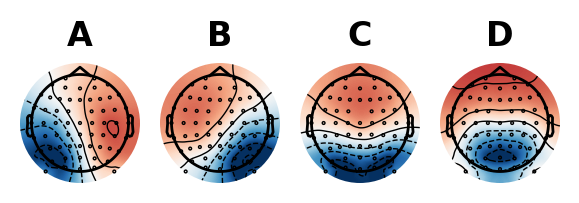

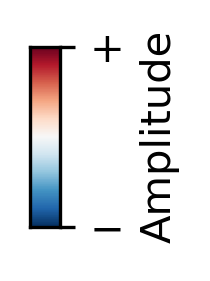

In [153]:
# %% Draw microstate cluster centers

print(np.percentile(np.abs(msc).flatten(), 95))
topomap_vmax = 0.25

fx, fy = 2.7, 1
fig = plt.figure(figsize = [fx, fy], dpi = 200)
for i in range(4):
    ax = plt.axes([0.7 * i / fx, 0.1 / fy, 0.6 / fx, 0.6 / fy])
    vis.disp_topomap(info, msc[i], cmap = "RdBu_r", vmin = -topomap_vmax, vmax = topomap_vmax, colorbar = False, sensors = True)
    fig.text((0.3 + 0.7 * i) / fx, 0.75 / fy, ms_comp_labels[i], ha = "center", va = "bottom", size = "large", fontweight = "bold")

fig.savefig(fig_path + "ms_centroids.svg", format = "svg")

# Draw colorbar
fig = vis.colorbar("RdBu_r", fs = [0.6, 0.8], bs = [0.1, 0.6], ticks = np.array([-1, 1]), vmin = -1, vmax = 1, \
                   tick_labels = [vis.minus_sign, "+"], caption = "Amplitude")
fig.savefig(fig_path + "ms_centroids_colorbar.svg", format = "svg")

0.1399046230766795
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
0.14942140406781274
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61


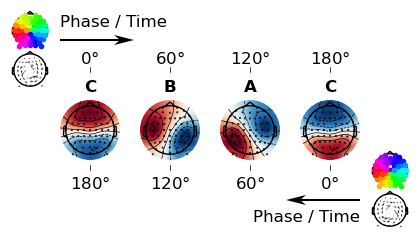

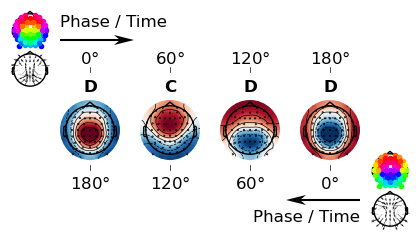

In [183]:
# %% Draw topomap sequences

# Rotational
def draw_topomap_sequence(tmp_map, topomap_vmax, phase):
    angles = np.linspace(0, np.pi, 181, True) + phase
    tmp_topomaps = np.array([(tmp_map * np.exp(1j * ai)).real for ai in angles])
    tmp_affs = core.topomap_affinity(tmp_topomaps, msc, True, False)
    
    print(np.percentile(np.abs(tmp_topomaps).flatten(), 95))

    fx, fy = 4, 2.2
    fig = plt.figure(figsize = [fx, fy])
    for i in range(4):
        ax = plt.axes([(0.5 + 0.8 * i) / fx, 0.7 / fy, 0.6 / fx, 0.6 / fy])
        vis.disp_topomap(info, tmp_topomaps[i * 60], cmap = "RdBu_r", vmin = -topomap_vmax, vmax = topomap_vmax, colorbar = False, sensors = True)
        fig.text((0.8 + 0.8 * i) / fx, 1.35 / fy, ms_comp_labels[np.argmax(tmp_affs[i * 60])], ha = "center", va = "bottom", size = "large", fontweight = "bold")
    
    ax = plt.axes([0, 1.8 / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_phasemap(info, tmp_map, markersize = 6)
    ax = plt.axes([0, 1.4 / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_quiver_map(info, tmp_map, show_r2 = True, sensors = False, scale = 40, width = 0.015)
    ax = plt.axes([0.5 / fx, 1.5 / fy, 3 / fx, 0.7 / fy])
    plt.axis([0, 3, 0, 0.7])
    vis.no_axes(ax)
    plt.plot([0, 0.6], [0.4, 0.4], lw = 1.5, c = "#000000")
    plt.arrow(0.6 - 0.2 * 0.3, 0.4, 0.2, 0, length_includes_head = True, width = 0, head_length = 0.2, head_width = 0.1, \
              head_starts_at_zero = False, overhang = 0.3, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
    for i in range(4):
        plt.text(0.3 + 0.8 * i, 0.13, r"${:}\degree$".format(i * 60), ha = "center", va = "bottom", size = "large")
        plt.plot([0.3 + 0.8 * i] * 2, [0.08, 0.13], lw = 0.5, c = "#000000")
    plt.text(0, 0.5, "Phase / Time", ha = "left", va = "bottom", size = "large")
    
    ax = plt.axes([3.6 / fx, 0.4 / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_phasemap(info, np.conj(tmp_map), markersize = 6)
    ax = plt.axes([3.6 / fx, 0 / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_quiver_map(info, np.conj(tmp_map), show_r2 = True, sensors = False, scale = 40, width = 0.015)
    ax = plt.axes([0.5 / fx, 0 / fy, 3 / fx, 0.7 / fy])
    plt.axis([0, 3, 0, 0.7])
    vis.no_axes(ax)
    plt.plot([2.4, 3], [0.3, 0.3], lw = 1.5, c = "#000000")
    plt.arrow(2.4 + 0.2 * 0.3, 0.3, -0.2, 0, length_includes_head = True, width = 0, head_length = 0.2, head_width = 0.1, \
              head_starts_at_zero = False, overhang = 0.3, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
    for i in range(4):
        plt.text(0.3 + 0.8 * i, 0.55, r"${:}\degree$".format((3 - i) * 60), ha = "center", va = "top", size = "large")
        plt.plot([0.3 + 0.8 * i] * 2, [0.6, 0.65], lw = 0.5, c = "#000000")
    plt.text(3, 0.2, "Phase / Time", ha = "right", va = "top", size = "large")

    return fig

fig = draw_topomap_sequence(ws[0], 0.14, np.pi / 2)
fig.savefig(fig_path + "topomap_seq_rot.svg", format = "svg")
fig = draw_topomap_sequence(ws[1], 0.15, np.pi / 2)
fig.savefig(fig_path + "topomap_seq_fw.svg", format = "svg")

### Extract segment statistics

In [6]:
# %% Functions for extracting microstate and traveling wave parameters

def extract_segment_params(t_seg):
    seg_ids = []
    seg_ms_cov = []
    seg_ms_trans = []
    seg_tw_te = []
    seg_tw_asym = []
    
    for i in range(n_fn_full):
        k_id = 0
        j0 = peaks[i][0]
        k0 = 0
        while j0 + t_seg * sfreq < peaks[i][-1]:
            k1 = np.searchsorted(peaks[i], j0 + t_seg * sfreq)
            if t_seg * sfreq - (peaks[i][k1 - 1] - j0) <= (peaks[i][k1] - j0) - t_seg * sfreq:
                k1 -= 1
            j1 = peaks[i][k1]

            seg_ids.append([i, k_id, j1 - j0, k1 - k0])
            
            # Compute microstate parameters
            tmp_affs = np.abs(ms_affs[i][j0 : j1])
            tmp_labels = np.argmax(tmp_affs, axis = 1)
            seg_ms_cov.append(np.array([(tmp_labels == p).mean() for p in range(4)]))
            tmp_trans = np.zeros([4, 4])
            for p in range(j1 - j0 - 1):
                tmp_trans[tmp_labels[p], tmp_labels[p + 1]] += 1
            tmp_trans /= j1 - j0 - 1
            seg_ms_trans.append(tmp_trans.flatten())

            # Compute traveling wave parameters
            kb0 = bounds[i] + k0
            kb1 = bounds[i] + k1
            seg_tw_te.append((projs[kb0 : kb1, : 4] ** 2).mean(axis = 0))
            seg_tw_asym.append(projs[kb0 : kb1, : 4].mean(axis = 0))

            # Next
            k_id += 1
            j0 = j1
            k0 = k1
    
    seg_ids = np.array(seg_ids)
    seg_ms_cov = np.array(seg_ms_cov)
    seg_ms_trans = np.array(seg_ms_trans)
    seg_tw_te = np.array(seg_tw_te)
    seg_tw_asym = np.array(seg_tw_asym)

    return seg_ids, seg_ms_cov, seg_ms_trans, seg_tw_te, seg_tw_asym

In [7]:
s_ids, sm_cov, sm_trans, st_te, st_asym = extract_segment_params(10)

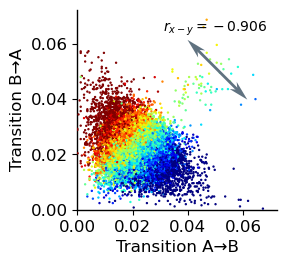

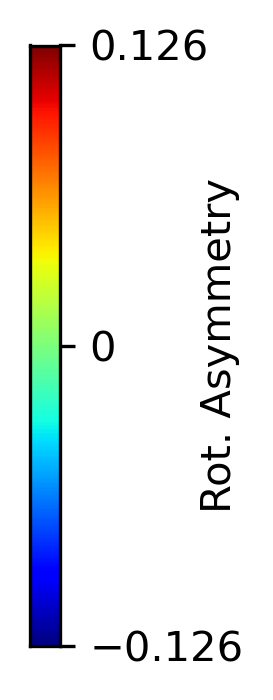

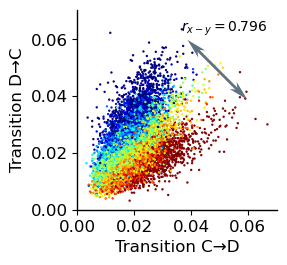

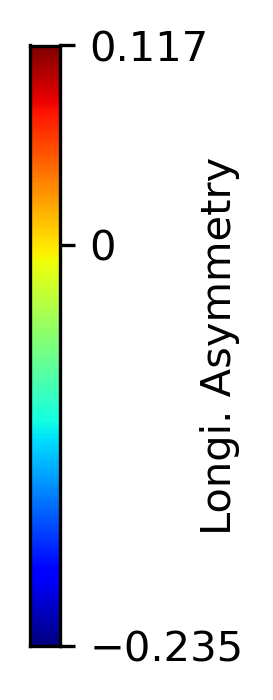

In [225]:
# %% Draw correlation between transition and traveling wave asymmetry

# Draw
for i1, i2, k3, fn_prefix in [(0, 1, 0, "msab_rot"), (2, 3, 1, "mscd_fw")]:
    k1 = i1 * 4 + i2
    k2 = i2 * 4 + i1
    asym_vmin = np.percentile(st_asym[ : , k3], 5)
    asym_vmax = np.percentile(st_asym[ : , k3], 95)
    trans_vmax = sm_trans[ : , [k1, k2]].max() / 0.95
    
    fx, fy = 2.8, 2.6
    fig = plt.figure(figsize = [fx, fy])
    ax = plt.axes([0.7 / fx, 0.5 / fy, 2 / fx, 2 / fy])
    plt.scatter(sm_trans[ : , k1], sm_trans[ : , k2], s = 0.5, c = st_asym[ : , k3], cmap = "jet", alpha = 1, \
                vmin = asym_vmin, vmax = asym_vmax)
    
    t_l, t_c, t_r = 0.6 * trans_vmax, 0.7 * trans_vmax, 0.8 * trans_vmax
    t_arr = 0.2 / 2 * trans_vmax * np.sqrt(2) / 2
    plt.plot([t_l, t_r], [t_r, t_l], lw = 2, c = arrow_color)
    plt.arrow(t_l + t_arr * 0.3, t_r - t_arr * 0.3, -t_arr, t_arr, length_includes_head = True, width = 0, head_length = t_arr * np.sqrt(2), head_width = t_arr / np.sqrt(2), \
              head_starts_at_zero = False, overhang = 0.3, fc = arrow_color, ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
    plt.arrow(t_r - t_arr * 0.3, t_l + t_arr * 0.3, t_arr, -t_arr, length_includes_head = True, width = 0, head_length = t_arr * np.sqrt(2), head_width = t_arr / np.sqrt(2), \
              head_starts_at_zero = False, overhang = 0.3, fc = arrow_color, ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
    plt.text(trans_vmax * 0.95, trans_vmax * 0.95, "$r_{x-y}=" + "{:.3f}$".format(np.corrcoef(sm_trans[ : , k1] - sm_trans[ : , k2], st_asym[ : , k3])[0, 1]), \
             ha = "right", va = "top", size = "medium")
    
    plt.axis([0, trans_vmax, 0, trans_vmax])
    vis.lower_left(ax)
    ax.set_yticks([0, 0.02, 0.04, 0.06])
    plt.xlabel("Transition {}→{}".format(ms_comp_labels[i1], ms_comp_labels[i2]), size = "large")
    plt.ylabel("Transition {}→{}".format(ms_comp_labels[i2], ms_comp_labels[i1]), size = "large")
    ax.tick_params(labelsize = "large")
    
    fig.savefig(fig_path + fn_prefix + "_correlation.svg", format = "svg")
    
    # Colorbar
    fig = vis.colorbar("jet", fs = [0.8, 2.2], bs = [0.1, 2], ticks = [asym_vmin, 0, asym_vmax], vmin = asym_vmin, vmax = asym_vmax, \
                       tick_labels = ["{:.3f}".format(asym_vmin).replace("-", vis.minus_sign), 0, "{:.3f}".format(asym_vmax)], caption = tw_comp_labels[k3] + " Asymmetry")
    fig.savefig(fig_path + fn_prefix + "_correlation_colorbar.svg", format = "svg")

In [8]:
# %% Get training and testing data matrices

def get_model_data(mask):
    n_mask = mask.sum()
    
    x = np.zeros([n_mask, 8])
    y = np.zeros([n_mask, 10])
    x[ : , : 4] = st_te[mask]
    x[ : , 4 : 8] = st_asym[mask]
    y[ : , : 4] = sm_cov[mask]

    k = 4
    for i in range(3):
        for j in range(i + 1, 4):
            y[ : , k] = sm_trans[mask, i * 4 + j] - sm_trans[mask, j * 4 + i]
            k += 1

    return x, y

def get_model_ceilings(mask):
    n_mask = mask.sum()

    ceilings = np.zeros([10])
    for i in range(4):
        ceilings[i] = 1 - (sm_cov[mask, i] * (1 - sm_cov[mask, i]) / s_ids[mask, 2]).sum() / ((sm_cov[mask, i] - sm_cov[mask, i].mean()) ** 2).sum()
    k = 4
    for i in range(3):
        p_trans_i = sm_trans[mask, i * 4 : (i + 1) * 4].sum(axis = 1)
        n_trans_i = p_trans_i * (s_ids[mask, 2] - 1)
        for j in range(i + 1, 4):
            p_trans_j = sm_trans[mask, j * 4 : (j + 1) * 4].sum(axis = 1)
            n_trans_j = p_trans_j * (s_ids[mask, 2] - 1)
            
            tmp1 = (sm_trans[mask, i * 4 + j] / p_trans_i * (1 - sm_trans[mask, i * 4 + j] / p_trans_i) * n_trans_i / (s_ids[mask, 2] ** 2)).sum()
            tmp2 = (sm_trans[mask, j * 4 + i] / p_trans_j * (1 - sm_trans[mask, j * 4 + i] / p_trans_j) * n_trans_j / (s_ids[mask, 2] ** 2)).sum()
            tmp_y = sm_trans[mask, i * 4 + j] - sm_trans[mask, j * 4 + i]
            ceilings[k] = 1 - (tmp1 + tmp2) / ((tmp_y - tmp_y.mean()) ** 2).sum()
            k += 1
    
    return ceilings

In [9]:
mask_train = s_ids[ : , 0] < n_fn_core
mask_test = ~mask_train

x_train, y_train = get_model_data(mask_train)
x_test, y_test = get_model_data(mask_test)
ceilings_train = get_model_ceilings(mask_train)
ceilings_test = get_model_ceilings(mask_test)

model = sklm.LinearRegression().fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [291]:
# %% Select the first test set subject

k1, k2, k3 = np.searchsorted(s_ids[ : , 0], [166, 167, 168]) - len(x_train)
ts_ec = np.concatenate([[0], np.cumsum(s_ids[k1 : k2, 2])]) / sfreq
ts_ec = (ts_ec[1 : ] + ts_ec[ : -1]) / 2
ts_eo = np.concatenate([[0], np.cumsum(s_ids[k2 : k3, 2])]) / sfreq
ts_eo = (ts_eo[1 : ] + ts_eo[ : -1]) / 2

print(ts_eo, "\n", ts_ec)

[  5.006  15.014  25.002  34.988  44.98   54.976  64.982  74.974  84.968
  94.972 104.978 114.98  124.96  134.938 144.924 154.91  164.912 174.904
 184.898 194.916 204.924 214.918 224.912 234.916 244.924 254.918 264.908
 274.912 284.906 294.89  304.896 314.896 324.88  334.884 344.902 354.904
 364.884 374.874 384.87  394.866 404.868 414.86  424.856 434.846 444.824
 454.818 464.818] 
 [  4.988  14.966  24.966  34.986  44.982  54.966  64.946  74.922  84.918
  94.918 104.914 114.906 124.912 134.918 144.904 154.89  164.884 174.884
 184.888 194.902 204.898 214.874 224.852 234.84  244.836 254.832 264.848
 274.872 284.874 294.856 304.846 314.85  324.852 334.838 344.816 354.802
 364.806 374.81  384.802 394.788 404.776 414.772 424.772 434.776 444.772
 454.754 464.738]


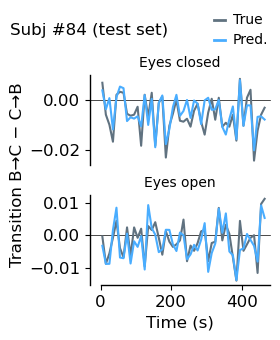

In [371]:
# %% Draw example of predicted microstate dynamics

i = 7

fx, fy = 2.8, 3.3
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.9 / fx, 1.7 / fy, 1.8 / fx, 0.9 / fy])
plt.plot(ts_ec, y_test[k1 : k2, i], c = regression_true_color)
plt.plot(ts_ec, pred_test[k1 : k2, i], c = regression_predicted_color)
plt.axis(xmin = -30, xmax = 480)
ax.set_frame_on(False)
ax.set_xticks([])
plt.axhline(y = 0, lw = 0.5, c = "#000000", zorder = -20, clip_on = False)
plt.axvline(x = -30, lw = 1, c = "#000000", clip_on = False)
ax.tick_params(labelsize = "large")
plt.title("Eyes closed", size = "medium")

ax = plt.axes([0.9 / fx, 0.5 / fy, 1.8 / fx, 0.9 / fy])
plt.plot(ts_eo, y_test[k2 : k3, i], c = regression_true_color)
plt.plot(ts_eo, pred_test[k2 : k3, i], c = regression_predicted_color)
axh = plt.axis(xmin = -30, xmax = 480)
ax.set_frame_on(False)
ax.set_xticks([0, 200, 400])
plt.axvline(x = -30, lw = 1, c = "#000000", clip_on = False)
plt.axhline(y = 0, lw = 0.5, c = "#000000", zorder = -20, clip_on = False)
plt.axhline(y = axh[2], xmin = 30 / 510, lw = 1, c = "#000000", clip_on = False)
ax.tick_params(labelsize = "large")
plt.xlabel("Time (s)", size = "large")
plt.title("Eyes open", size = "medium")

ax = plt.axes([2.1 / fx, 2.85 / fy, 0.6 / fx, 0.4 / fy])
vis.no_axes(ax)
plt.axis([0, 0.8, 0, 0.4])
plt.plot([0.05, 0.2], [0.1, 0.1], lw = 2, c = regression_predicted_color)
plt.text(0.3, 0.1, "Pred.", ha = "left", va = "center", size = "medium")
plt.plot([0.05, 0.2], [0.3, 0.3], lw = 2, c = regression_true_color)
plt.text(0.3, 0.3, "True", ha = "left", va = "center", size = "medium")

fig.text(0.1 / fx, 3.05 / fy, "Subj #84 (test set)", ha = "left", va = "center", size = "large")
fig.text(0.1 / fx, 1.6 / fy, "Transition B→C " + vis.minus_sign + " C→B", ha = "left", va = "center", size = "large", rotation = 90)

fig.savefig(fig_path + "regression_example.svg", format = "svg")

In [10]:
for i in range(y_train.shape[1]):
    r2_train, r2_test = metrics.r2_score(y_train[ : , i], pred_train[ : , i]), metrics.r2_score(y_test[ : , i], pred_test[ : , i])
    print(r2_train, ceilings_train[i], r2_train / ceilings_train[i], r2_test, ceilings_test[i], r2_test / ceilings_test[i])

0.6528309133559485 0.9839797897631964 0.6634596768629344 0.5905954607241681 0.985219094678304 0.599455962551163
0.2509567128623835 0.9778074738314648 0.25665247973512473 0.21322652991530922 0.9777267491044542 0.21808396887025275
0.4287723673641701 0.992032367319001 0.4322161065398915 0.4259387491526665 0.9913577376509551 0.42965191370971506
0.11508530939964778 0.9881599610828868 0.11646425065991359 0.08553294073063045 0.9874276943893885 0.08662197871969028
0.8904536813118454 0.8592229319178724 1.0363476674490786 0.8753704160455533 0.8516652247658077 1.0278339312096065
0.8238800299550585 0.8470465653225944 0.9726502221767312 0.8135510425729168 0.8388286923048679 0.9698655399322414
0.6926437591353322 0.7181224851704345 0.9645203616914245 0.6509464399326315 0.6736385209687275 0.9663141576234928
0.8240851616277263 0.8556956958987941 0.9630586732847064 0.8047888069450314 0.8411982464912757 0.9567171713705873
0.5041682273029866 0.5939643716338079 0.8488189719463803 0.5012900059044136 0.57519

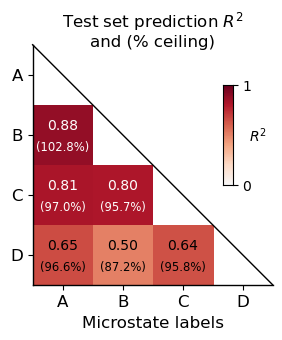

In [11]:
# % Calculate and draw transition matrix prediction performance

rsqs = np.zeros([4, 4])
ceilings = np.zeros([4, 4])

for i in range(4, 10):
    j, k = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)][i - 4]
    rsqs[j, k] = metrics.r2_score(y_test[ : , i], pred_test[ : , i])
    ceilings[j, k] = ceilings_test[i]

# Draw
fx, fy = 2.8, 3.3
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.3 / fx, 0.5 / fy, 2.4 / fx, 2.4 / fy])
plt.imshow(rsqs.T, vmin = -1, vmax = 1, cmap = "RdBu_r")
mask = np.ones([4, 4, 4])
for i in range(3):
    for j in range(i + 1, 4):
        tmp_color = "#000000" if vis.luminance(mpl.colormaps.get_cmap("RdBu_r")((rsqs[i, j] + 1) / 2)) > 0.5 else "#FFFFFF"
        plt.text(i, j - 0.15, "{:.2f}".format(rsqs[i, j], rsqs[i, j] / ceilings[i, j]), ha = "center", va = "center", size = "medium", c = tmp_color)
        plt.text(i, j + 0.2, "({:.1%})".format(rsqs[i, j] / ceilings[i, j]), ha = "center", va = "center", size = "small", c = tmp_color)
        mask[j, i, 3] = 0
plt.imshow(mask) 
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(ms_comp_labels)
ax.set_yticklabels(ms_comp_labels)
ax.tick_params(labelsize = "large")
ax.set_frame_on(False)
plt.axhline(y = 3.5, lw = 1, c = "#000000", clip_on = False)
plt.axvline(x = -0.5, lw = 1, c = "#000000", clip_on = False)
plt.plot([-0.5, 3.5], [-0.5, 3.5], lw = 1, c = "#000000", zorder = 10, clip_on = False)

plt.xlabel("Microstate labels", size = "large")
fig.text(1.5 / fx, 2.85 / fy, "Test set prediction $R^2$\nand (% ceiling)", ha = "center", va = "bottom", size = "large")
plt.text(3.1, 1, "$R^2$", ha = "left", va = "center", size = "medium")

ax = plt.axes([2.2 / fx, 1.5 / fy, 0.1 / fx, 1 / fy])
tmp_lin = np.linspace(0, 1, 1001, True)
plt.pcolormesh([0, 1], tmp_lin, ((tmp_lin[ : -1] + tmp_lin[1 : ]) / 2).reshape([-1, 1]), \
               cmap = "RdBu_r", vmin = -1, vmax = 1)
ax.yaxis.tick_right()
ax.tick_params(labelsize = "medium")
ax.set_xticks([])
ax.set_yticks([0, 1])

fig.savefig(fig_path + "regression_r2_matrix.svg", format = "svg")

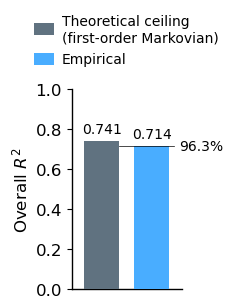

In [410]:
# %% Calculate and draw overall performance and ceiling level

r2_sum = 0
ceiling_sum = 0
for i in range(4, 10):
    j, k = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)][i - 4]
    r2_sum += rsqs[j, k]
    ceiling_sum += ceilings[j, k]
r2_mean = r2_sum / 6
ceiling_mean = ceiling_sum / 6

fx, fy = 2.3, 2.9
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.7 / fx, 0.1 / fy, 1.1 / fx, 2 / fy])
plt.bar(0, ceiling_mean, width = 0.7, color = regression_true_color)
plt.bar(1, r2_mean, width = 0.7, color = regression_predicted_color)
plt.axis([-0.6, 1.6, 0, 1])
vis.lower_left(ax)
ax.set_xticks([])
ax.tick_params(labelsize = "large")
plt.ylabel("Overall $R^2$", size = "large")
plt.text(0, ceiling_mean + 0.05 / 2, "{:.3f}".format(ceiling_mean), ha = "center", va = "bottom", size = "medium")
plt.text(1, r2_mean + 0.05 / 2, "{:.3f}".format(r2_mean), ha = "center", va = "bottom", size = "medium")
plt.plot([0.35, 1.45], [r2_mean] * 2, lw = 0.5, c = "#000000", clip_on = False)
plt.text(1.45 + 0.05 / 1.1 * 2.2, r2_mean, "{:.1%}".format(r2_mean / ceiling_mean), ha = "left", va = "center", size = "medium")

ax = plt.axes([0.3 / fx, 2.3 / fy, 2 / fx, 0.6 / fy])
vis.no_axes(ax)
plt.axis([0, 2, 0, 0.6])
rect = mpl.patches.Rectangle([0.02, 0.34], 0.2, 0.12, ec = "#00000000", lw = 1, fc = regression_true_color)
ax.add_patch(rect)
plt.text(0.3, 0.48, "Theoretical ceiling", ha = "left", va = "center", size = "medium")
plt.text(0.3, 0.32, "(first-order Markovian)", ha = "left", va = "center", size = "medium")
rect = mpl.patches.Rectangle([0.02, 0.04], 0.2, 0.12, ec = "#00000000", lw = 1, fc = regression_predicted_color)
ax.add_patch(rect)
plt.text(0.3, 0.1, "Empirical", ha = "left", va = "center", size = "medium")

fig.savefig(fig_path + "regression_ceiling_percentage.svg", format = "svg")

### Diagrams

In [532]:
# %% Load EEG data for visualization

tmp_seg_ms = iter_cms(0)[0]
tmp_seg_tw = iter_twms(0)[0]

Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB



/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path + fn + ".set").load_data()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


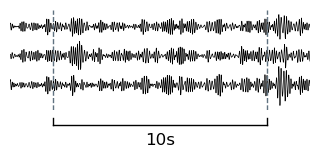

In [576]:
# %% EEG 10s segments

p0 = tmp_seg_ms.peaks[0] + s_ids[0, 2]
k0 = p0 - int(sfreq) * 2
k1 = p0
k2 = p0 + s_ids[1, 2]
k3 = k2 + int(sfreq) * 2

fx, fy = 3, 1.4
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0, 0.4 / fy, 1, 1 / fy])
plt.plot(np.arange(k0, k3), tmp_seg_ms.data[k0 : k3, 0], lw = 0.5, c = "#000000")
plt.plot(np.arange(k0, k3), tmp_seg_ms.data[k0 : k3, 1] - 2e-5, lw = 0.5, c = "#000000")
plt.plot(np.arange(k0, k3), tmp_seg_ms.data[k0 : k3, 2] - 4e-5, lw = 0.5, c = "#000000")
plt.axvline(x = k1, lw = 1, c = default_color, ls = "--", zorder = 10)
plt.axvline(x = k2, lw = 1, c = default_color, ls = "--", zorder = 10)
plt.axis(xmin = k0, xmax = k3)
vis.no_axes(ax)

ax = plt.axes([0, 0, 1, 0.4 / fy])
plt.axis([k0, k3, 0, 0.4])
plt.plot([k1] * 2, [0.25, 0.32], lw = 1, c = "#000000")
plt.plot([k2] * 2, [0.25, 0.32], lw = 1, c = "#000000")
plt.plot([k1, k2], [0.25] * 2, lw = 1, c = "#000000")
plt.text((k1 + k2) / 2, 0.02, "10s", ha = "center", va = "bottom", size = "large")
vis.no_axes(ax)

fig.savefig(fig_path + "eeg_10s_sample.svg", format = "svg")

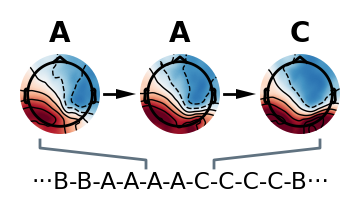

In [577]:
# %% Microstate sequences

p0 = tmp_seg_ms.peaks[1] + 7
tmp_topomaps = tmp_seg_ms.data[p0 : p0 + 3]
vmax = np.percentile(np.abs(tmp_topomaps).flatten(), 95)
tmp_affs = core.topomap_affinity(tmp_topomaps, msc, True, False)

st = "···"
for i in range(p0 - 4, p0 + 7):
    st += ms_comp_labels[np.argmax(core.topomap_affinity(tmp_seg_ms.data[i], msc, True, False))]
    if i != p0 + 6:
        st += "-"
st += "···"

# Draw
fx, fy = 1.6, 1
fig = plt.figure(figsize = [fx, fy], dpi = 200)
for i in range(3):
    ax = plt.axes([0.6 * i / fx, 0.35 / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_topomap(info, tmp_topomaps[i], sensors = False, colorbar = False, cmap = "RdBu_r", vmin = -vmax, vmax = vmax)
    fig.text((0.2 + 0.6 * i) / fx, 0.78 / fy, ms_comp_labels[np.argmax(tmp_affs[i])], ha = "center", va = "bottom", size = "medium", fontweight = "bold")
for i in range(2):
    ax = plt.axes([(0.4 + i * 0.6) / fx, 0.45 / fy, 0.2 / fx, 0.2 / fy])
    plt.axis([0, 0.2, 0, 0.2])
    plt.arrow(0.08, 0.1, 0.1, 0, length_includes_head = True, width = 0, head_length = 0.1, head_width = 0.05, \
              head_starts_at_zero = False, fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
    plt.plot([0.02, 0.08], [0.1, 0.1], lw = 1, c = "#000000")
    vis.no_axes(ax)

ax = plt.axes([0, 0, 1.6 / fx, 0.35 / fy])
plt.axis([0, 1.6, 0, 0.35])
plt.text(0.8, 0.05, st, ha = "center", va = "bottom", size = "small")
plt.plot([0.1, 0.1, 0.63, 0.63], [0.32, 0.28, 0.22, 0.18], lw = 1, c = default_color)
plt.plot([1.5, 1.5, 0.97, 0.97], [0.32, 0.28, 0.22, 0.18], lw = 1, c = default_color)
vis.no_axes(ax)

fig.savefig(fig_path + "microstate_transition_example.svg", format = "svg")

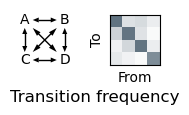

In [590]:
# %% First-order Markov

fx, fy = 1.8, 1.05
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.1 / fx, 0.4 / fy, 0.6 / fx, 0.6 / fy])
plt.axis([0, 0.6, 0, 0.6])
coords = [[0.1, 0.5], [0.5, 0.5], [0.1, 0.1], [0.5, 0.1]]
for i in range(4):
    plt.text(coords[i][0], coords[i][1], ms_comp_labels[i], ha = "center", va = "center", size = "medium")
for i in range(4):
    for j in range(4):
        if i != j:
            ix = 0.65 * coords[i][0] + 0.35 * coords[j][0]
            iy = 0.65 * coords[i][1] + 0.35 * coords[j][1]
            jx = 0.35 * coords[i][0] + 0.65 * coords[j][0]
            jy = 0.35 * coords[i][1] + 0.65 * coords[j][1]
            if i > j:
                plt.plot([ix, jx], [iy, jy], lw = 1, c = "#000000")
            plt.arrow(jx, jy, (jx - ix) / 2, (jy - iy) / 2, length_includes_head = True, width = 0, \
                      head_length = np.sqrt((jx - ix) ** 2 + (jy - iy) ** 2) / 2, head_width = 0.05, head_starts_at_zero = False, \
                      fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
vis.no_axes(ax)

tmp_trans = np.zeros([4, 4, 4])
tmp_trans[..., : 3] = vis.rgb_str2arr(default_color)
tmp_trans[..., 3] = ((np.log(sm_trans[0]) + 4.5) / 3).reshape([4, 4])
ax = plt.axes([1.05 / fx, 0.45 / fy, 0.5 / fx, 0.5 / fy])
plt.imshow(tmp_trans)
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel("From", size = "medium")
plt.ylabel("To", size = "medium")

fig.text(0.9 / fx, 0.05 / fy, "Transition frequency", ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "microstate_markov_diagram.svg", format = "svg")

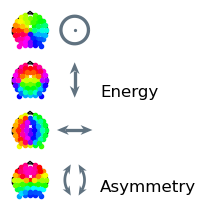

In [644]:
# %% Traveling waves

len_cm = 1 / 2.54

fx, fy = 1.9, 1.9
fig = plt.figure(figsize = [fx, fy])
for i in range(4):
    ax = plt.axes([0, 0.5 * (3 - i) / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_phasemap(info, ws[i], markersize=  6)

    ax = plt.axes([0.45 / fx, (0.5 * (3 - i) + (0.4 - len_cm) / 2) / fy, len_cm / fx, len_cm / fy])
    if i == 0:
        icons.rotation(default_color, default_color, len_cm)
    else:
        [icons.longitudinal, icons.horizontal, icons.lateral][i - 1](default_color, len_cm)
    vis.no_axes(ax)
    plt.axis([-0.5, 0.5, -0.5, 0.5])

fig.text(0.9 / fx, 1 / fy, "Energy", ha = "left", va = "bottom", size = "large")
fig.text(0.9 / fx, 0.05 / fy, "Asymmetry", ha = "left", va = "bottom", size = "large")

fig.savefig(fig_path + "traveling_wave_diagram.svg", format = "svg")

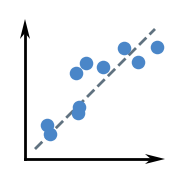

In [657]:
# %% Linear modeling diagram

fx, fy = 0.8, 0.8
fig = plt.figure(figsize = [fx, fy], dpi = 200)
ax = plt.axes([0.1 / fx, 0.1 / fy, 0.7 / fx, 0.7 / fy])
plt.axis([0, 0.7, 0, 0.7])
plt.plot([0, 0.63], [0, 0], lw = 1, c = "#000000", clip_on = False)
plt.arrow(0.6, 0, 0.1, 0, length_includes_head = True, width = 0, head_length = 0.1, head_width = 0.05, head_starts_at_zero = False, overhang = 0.3, \
          fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)
plt.plot([0, 0], [0, 0.63], lw = 1, c = "#000000", clip_on = False)
plt.arrow(0, 0.6, 0, 0.1, length_includes_head = True, width = 0, head_length = 0.1, head_width = 0.05, head_starts_at_zero = False, overhang = 0.3, \
          fc = "#000000", ec = "#00000000", lw = 1, zorder = 10, clip_on = False)

random_state = np.random.RandomState(seed = 1)
tmp_xs = random_state.random(size = [10]) * 0.3 + np.linspace(0, 0.5, 10, True)
tmp_ys = random_state.random(size = [10]) * 0.3 + np.linspace(0, 0.5, 10, True)
plt.scatter(tmp_xs, tmp_ys, s = 15, c = diagram_scatter_color)
plt.plot([0.05, 0.65], [0.05, 0.65], "--", lw = 1, c = default_color, zorder = -10)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig(fig_path + "linear_modeling_diagram.svg", format = "svg")